<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


# **SpaceX  Falcon 9 First Stage Landing Prediction**


 ## Hands-on Lab: Complete the EDA with Visualization


Estimated time needed: **70** minutes


In this assignment, we will predict if the Falcon 9 first stage will land successfully. SpaceX advertises Falcon 9 rocket launches on its website with a cost of 62 million dollars; other providers cost upward of 165 million dollars each, much of the savings is due to the fact that SpaceX can reuse the first stage.

In this lab, you will perform Exploratory Data Analysis and Feature Engineering.


Falcon 9 first stage will land successfully


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/landing_1.gif)


Several examples of an unsuccessful landing are shown here:


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/crash.gif)


Most unsuccessful landings are planned. Space X performs a controlled landing in the oceans.


  ## Objectives
Perform exploratory Data Analysis and Feature Engineering using `Pandas` and `Matplotlib`

- Exploratory Data Analysis
- Preparing Data  Feature Engineering


----


Install the below libraries


In [1]:
!pip install pandas
!pip install numpy
!pip install seaborn
!pip install matplotlib

### Import Libraries and Define Auxiliary Functions


We will import the following libraries the lab



In [2]:
# andas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
#NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns

## Exploratory Data Analysis


First, let's read the SpaceX dataset into a Pandas dataframe and print its summary


In [15]:
df=pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv")

# If you were unable to complete the previous lab correctly you can uncomment and load this csv

df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/dataset_part_2.csv')
df.head(5)



,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


In [31]:
import pandas as pd

# Leer el archivo directamente desde el enlace
df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv')

# Seleccionar las columnas originales relevantes
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights',
               'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block',
               'ReusedCount', 'Serial']]

# Aplicar codificación one-hot a columnas categóricas
features_one_hot = pd.get_dummies(features, columns=['Orbit', 'LaunchSite', 'LandingPad', 'Serial'])

# Mostrar el número total de columnas resultantes
print("Número total de columnas después de one-hot encoding:", features_one_hot.shape[1])

# Mostrar las primeras filas (opcional)
print(features_one_hot.head())

Número total de columnas después de one-hot encoding: 80
   FlightNumber  PayloadMass  Flights  GridFins  Reused   Legs  Block  \
0             1  6104.959412        1     False   False  False    1.0   
1             2   525.000000        1     False   False  False    1.0   
2             3   677.000000        1     False   False  False    1.0   
3             4   500.000000        1     False   False  False    1.0   
4             5  3170.000000        1     False   False  False    1.0   

   ReusedCount  Orbit_ES-L1  Orbit_GEO  ...  Serial_B1048  Serial_B1049  \
0            0        False      False  ...         False         False   
1            0        False      False  ...         False         False   
2            0        False      False  ...         False         False   
3            0        False      False  ...         False         False   
4            0        False      False  ...         False         False   

   Serial_B1050  Serial_B1051  Serial_B1054  Serial_B

First, let's try to see how the `FlightNumber` (indicating the continuous launch attempts.) and `Payload` variables would affect the launch outcome.

We can plot out the <code>FlightNumber</code> vs. <code>PayloadMass</code>and overlay the outcome of the launch. We see that as the flight number increases, the first stage is more likely to land successfully. The payload mass is also important; it seems the more massive the payload, the less likely the first stage will return.


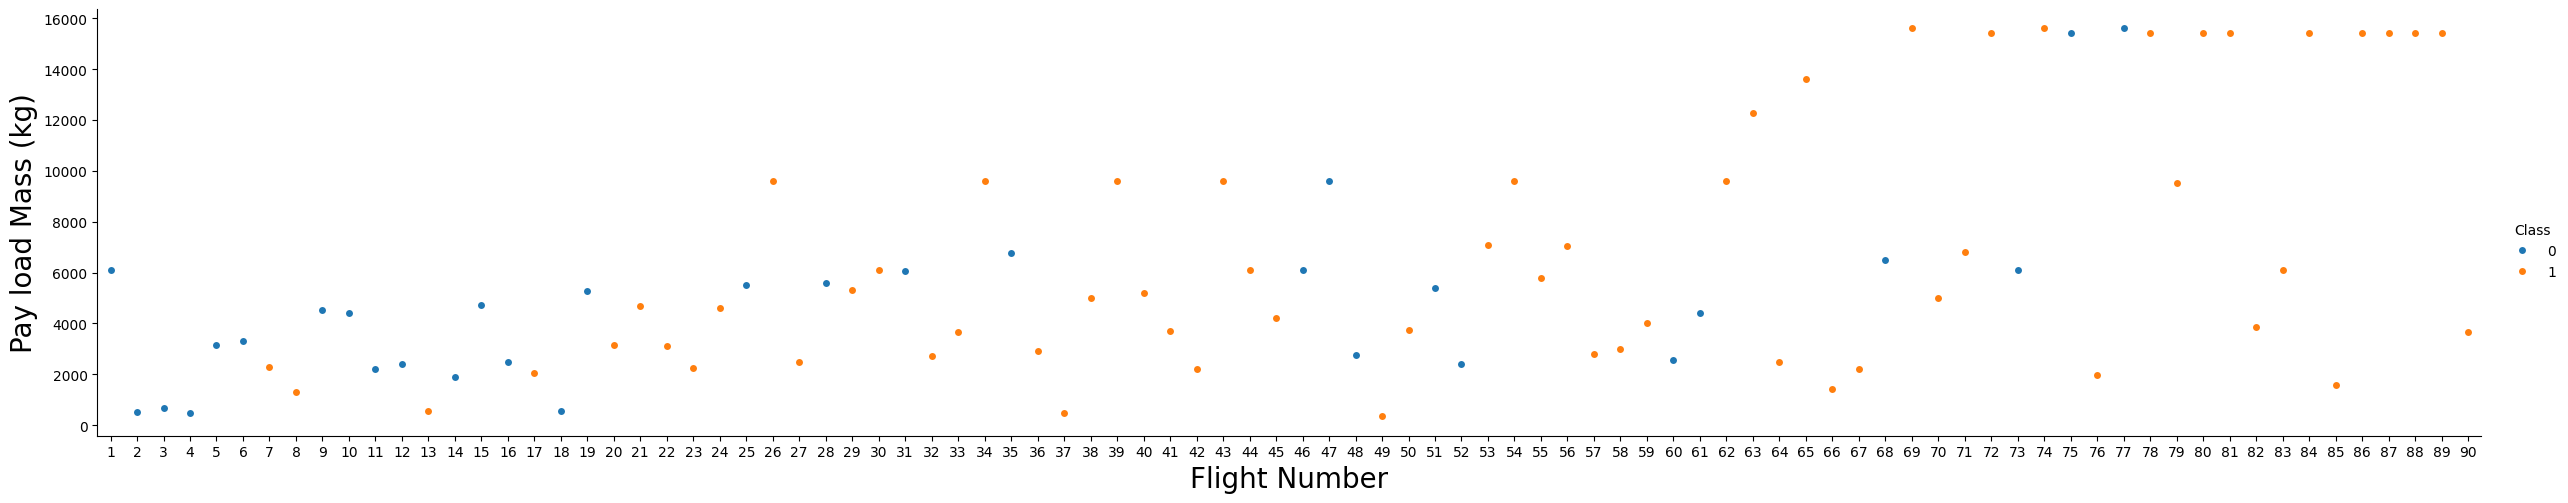

In [16]:
sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.show()

Next, let's drill down to each site visualize its detailed launch records.


### TASK 1: Visualize the relationship between Flight Number and Launch Site


Use the function <code>catplot</code> to plot <code>FlightNumber</code> vs <code>LaunchSite</code>, set the  parameter <code>x</code>  parameter to <code>FlightNumber</code>,set the  <code>y</code> to <code>Launch Site</code> and set the parameter <code>hue</code> to <code>'class'</code>


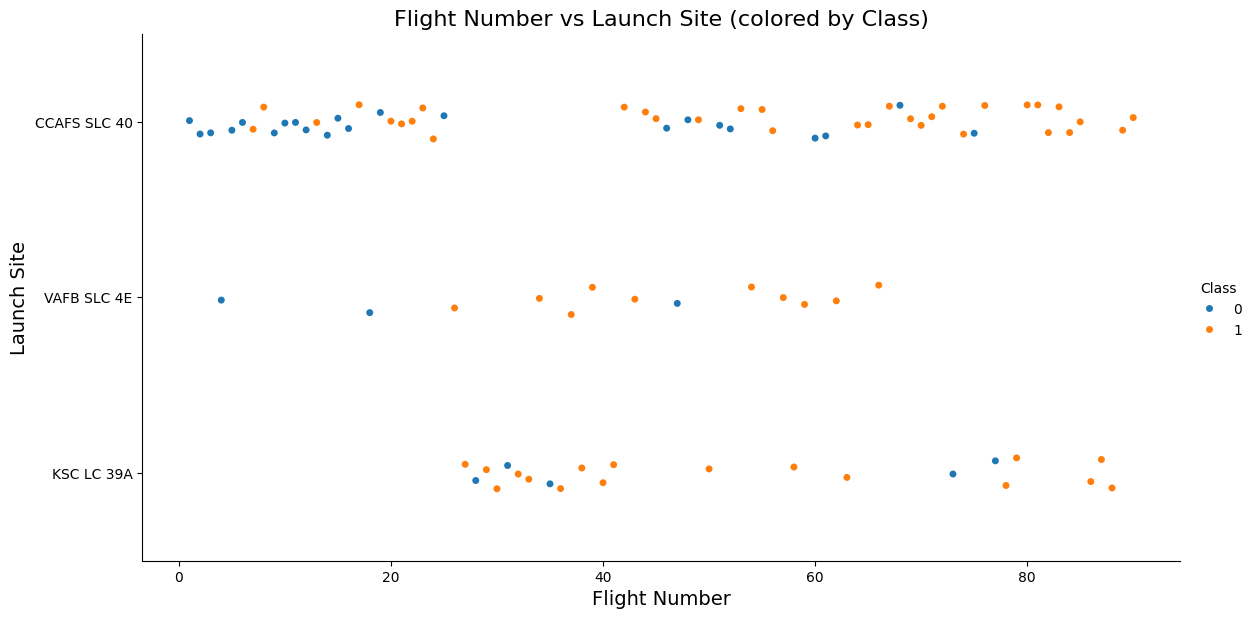

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear gráfico: Flight Number vs Launch Site con hue='Class'
sns.catplot(
    x="FlightNumber",
    y="LaunchSite",
    hue="Class",         # Usa 'Class' porque así se llama en el CSV
    data=df,
    kind="strip",
    height=6,
    aspect=2
)

plt.xlabel("Flight Number", fontsize=14)
plt.ylabel("Launch Site", fontsize=14)
plt.title("Flight Number vs Launch Site (colored by Class)", fontsize=16)
plt.show()

Now try to explain the patterns you found in the Flight Number vs. Launch Site scatter point plots.


### TASK 2: Visualize the relationship between Payload and Launch Site


We also want to observe if there is any relationship between launch sites and their payload mass.


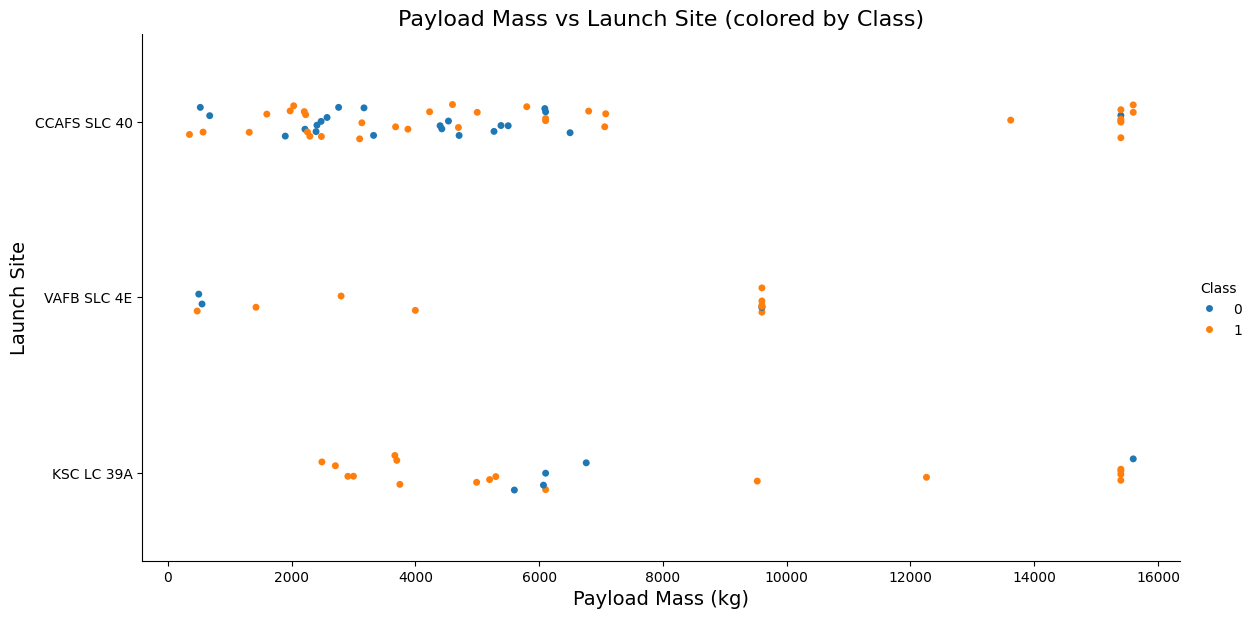

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear gráfico de dispersión: Payload vs Launch Site con resultado como hue
sns.catplot(
    x="PayloadMass",           # Eje X: masa de la carga útil
    y="LaunchSite",            # Eje Y: sitio de lanzamiento
    hue="Class",               # Color por resultado (1 = éxito, 0 = fallo)
    data=df,
    kind="strip",              # scatter plot
    height=6,
    aspect=2
)

plt.xlabel("Payload Mass (kg)", fontsize=14)
plt.ylabel("Launch Site", fontsize=14)
plt.title("Payload Mass vs Launch Site (colored by Class)", fontsize=16)
plt.show()

Now if you observe Payload Vs. Launch Site scatter point chart you will find for the VAFB-SLC  launchsite there are no  rockets  launched for  heavypayload mass(greater than 10000).


### TASK  3: Visualize the relationship between success rate of each orbit type


Next, we want to visually check if there are any relationship between success rate and orbit type.


Let's create a `bar chart` for the sucess rate of each orbit


In [21]:
# Agrupar por órbita y calcular tasa de éxito promedio
success_rate = df.groupby('Orbit')['Class'].mean().reset_index()

Analyze the ploted bar chart try to find which orbits have high sucess rate.


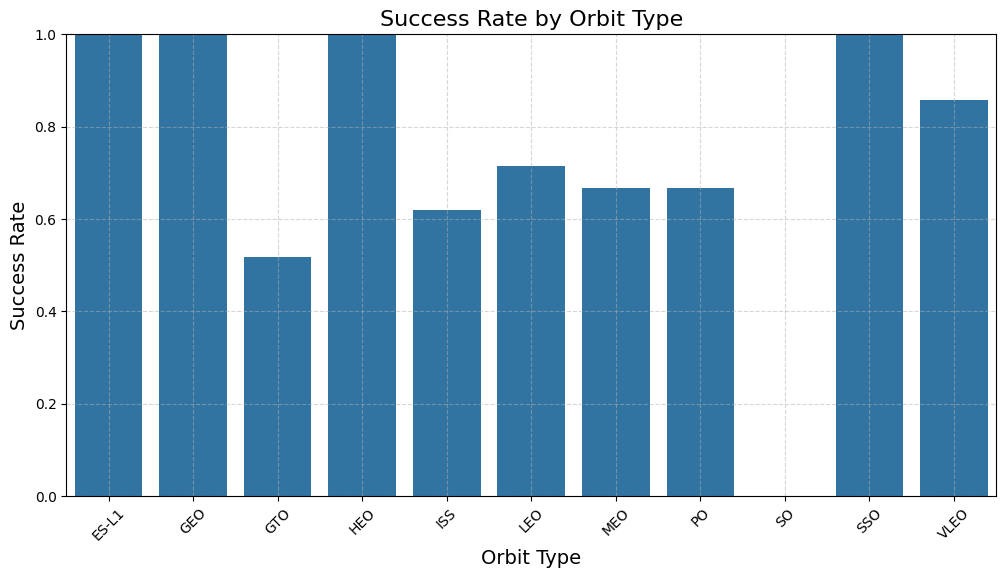

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(x='Orbit', y='Class', data=success_rate)

# Etiquetas y título
plt.xlabel("Orbit Type", fontsize=14)
plt.ylabel("Success Rate", fontsize=14)
plt.title("Success Rate by Orbit Type", fontsize=16)
plt.xticks(rotation=45)
plt.ylim(0, 1)  # La tasa de éxito va de 0 a 1
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

### TASK  4: Visualize the relationship between FlightNumber and Orbit type


For each orbit, we want to see if there is any relationship between FlightNumber and Orbit type.


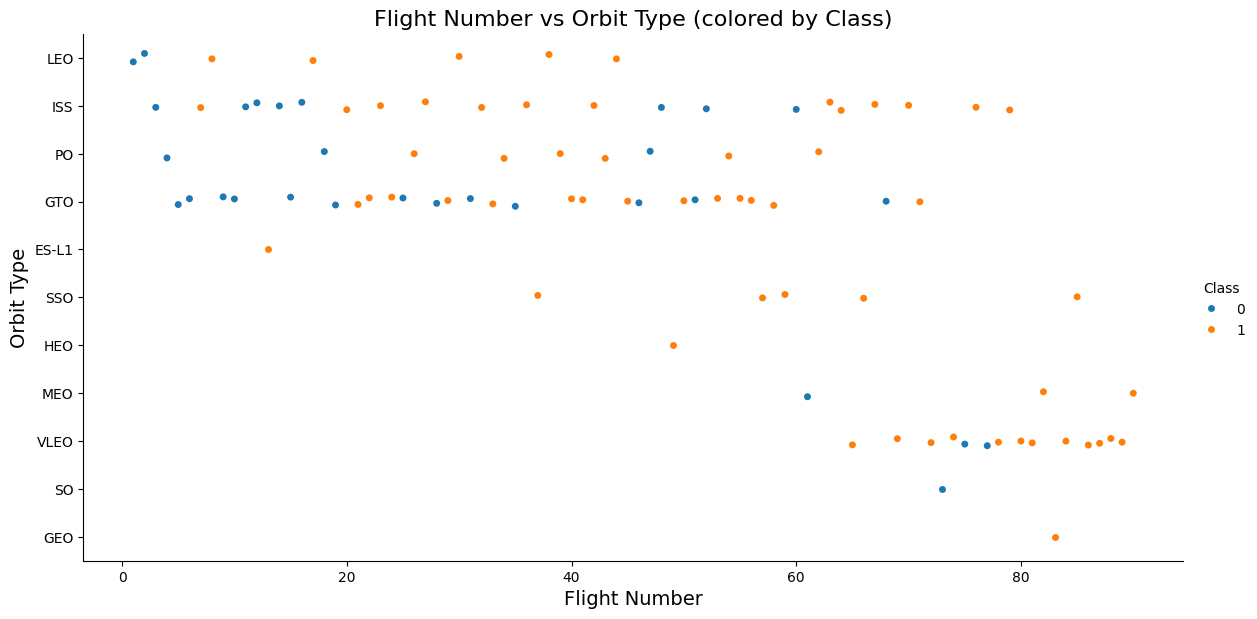

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear gráfico de dispersión: Flight Number vs Orbit, coloreado por éxito
sns.catplot(
    x="FlightNumber",
    y="Orbit",
    hue="Class",
    data=df,
    kind="strip",
    height=6,
    aspect=2
)

plt.xlabel("Flight Number", fontsize=14)
plt.ylabel("Orbit Type", fontsize=14)
plt.title("Flight Number vs Orbit Type (colored by Class)", fontsize=16)
plt.show()

You should see that in the LEO orbit the Success appears related to the number of flights; on the other hand, there seems to be no relationship between flight number when in GTO orbit.


### TASK  5: Visualize the relationship between Payload and Orbit type


Similarly, we can plot the Payload vs. Orbit scatter point charts to reveal the relationship between Payload and Orbit type


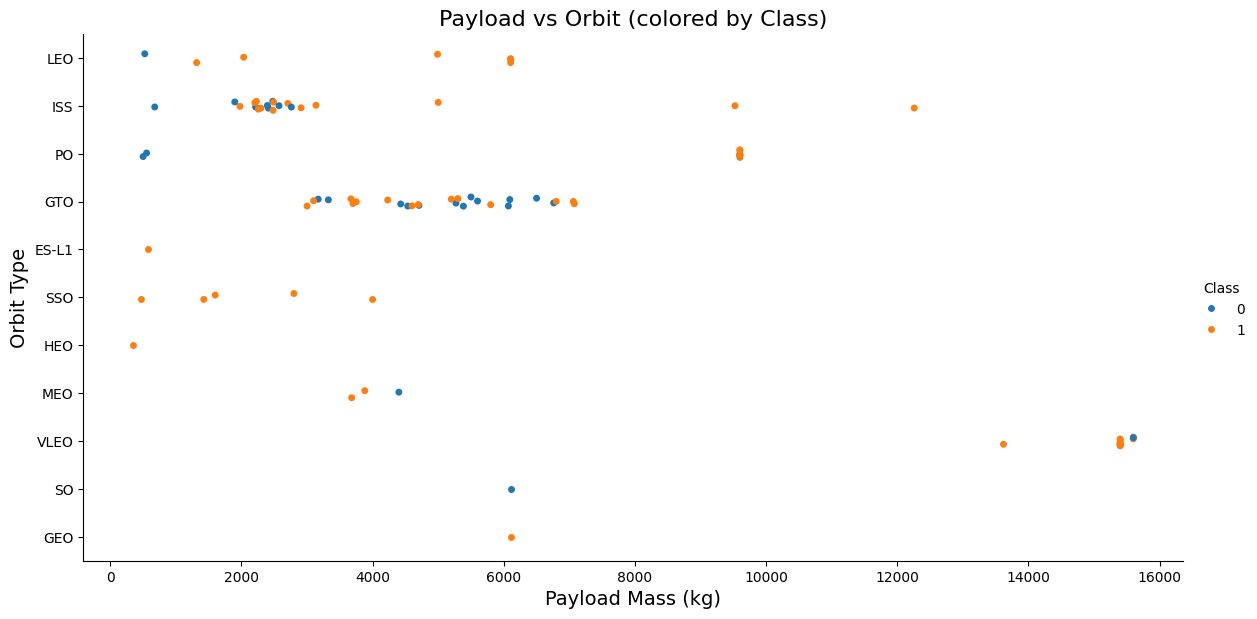

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear gráfico de dispersión con payload en el eje X y órbita en el eje Y
sns.catplot(
    x="PayloadMass",
    y="Orbit",
    hue="Class",          # Muestra si fue exitoso (1) o no (0)
    data=df,
    kind="strip",         # scatter plot style
    height=6,
    aspect=2
)

# Etiquetas y título
plt.xlabel("Payload Mass (kg)", fontsize=14)
plt.ylabel("Orbit Type", fontsize=14)
plt.title("Payload vs Orbit (colored by Class)", fontsize=16)
plt.show()

With heavy payloads the successful landing or positive landing rate are more for Polar,LEO and ISS.   

However for GTO we cannot distinguish this well as both positive landing rate and negative landing(unsuccessful mission) are both there here.




### TASK  6: Visualize the launch success yearly trend


You can plot a line chart with x axis to be <code>Year</code> and y axis to be average success rate, to get the average launch success trend.


The function will help you get the year from the date:


In [26]:
# Crear una nueva columna 'Year' a partir de 'Date'
df['Year'] = df['Date'].apply(lambda x: x.split("-")[0])

# Calcular tasa de éxito promedio por año
yearly_success = df.groupby('Year')['Class'].mean().reset_index()


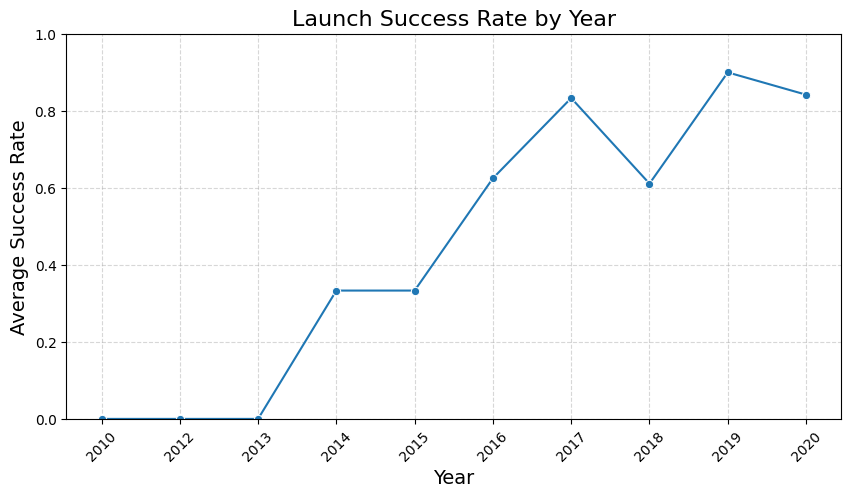

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear gráfico de línea
plt.figure(figsize=(10, 5))
sns.lineplot(x='Year', y='Class', data=yearly_success, marker='o')

# Estilo
plt.xlabel("Year", fontsize=14)
plt.ylabel("Average Success Rate", fontsize=14)
plt.title("Launch Success Rate by Year", fontsize=16)
plt.ylim(0, 1)
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(rotation=45)
plt.show()

You can observe that the success rate since 2013 kept increasing till 2017 (stable in 2014) and after 2015 it started increasing.


## Features Engineering


By now, you should obtain some preliminary insights about how each important variable would affect the success rate, we will select the features that will be used in success prediction in the future module.


In [28]:
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,6104.959412,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0003
1,2,525.000000,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0005
2,3,677.000000,ISS,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0007
3,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003
4,5,3170.000000,GTO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B1004


from matplotlib import pyplot as plt
_df_0['FlightNumber'].plot(kind='hist', bins=20, title='FlightNumber')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['PayloadMass'].plot(kind='hist', bins=20, title='PayloadMass')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_2.groupby('Orbit').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_3.groupby('LaunchSite').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('Serial').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='FlightNumber', y='PayloadMass', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['FlightNumber']
  ys = series['PayloadMass']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_6.sort_values('FlightNumber', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Orbit')):
  _plot_series(series, series_name, i)
  fig.legend(title='Orbit', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('FlightNumber')
_ = plt.ylabel('PayloadMass')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['FlightNumber']
  ys = series['PayloadMass']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_7.sort_values('FlightNumber', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('LaunchSite')):
  _plot_series(series, series_name, i)
  fig.legend(title='LaunchSite', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('FlightNumber')
_ = plt.ylabel('PayloadMass')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['FlightNumber']
  ys = series['PayloadMass']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('FlightNumber', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Serial')):
  _plot_series(series, series_name, i)
  fig.legend(title='Serial', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('FlightNumber')
_ = plt.ylabel('PayloadMass')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['FlightNumber']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'FlightNumber'}, axis=1)
              .sort_values('FlightNumber', ascending=True))
  xs = counted['FlightNumber']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('FlightNumber', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Orbit')):
  _plot_series(series, series_name, i)
  fig.legend(title='Orbit', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('FlightNumber')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_10['FlightNumber'].plot(kind='line', figsize=(8, 4), title='FlightNumber')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['PayloadMass'].plot(kind='line', figsize=(8, 4), title='PayloadMass')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['LaunchSite'].value_counts()
    for x_label, grp in _df_12.groupby('Orbit')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Orbit')
_ = plt.ylabel('LaunchSite')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Serial'].value_counts()
    for x_label, grp in _df_13.groupby('LaunchSite')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('LaunchSite')
_ = plt.ylabel('Serial')

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_14['Orbit'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_14, x='FlightNumber', y='Orbit', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_15['LaunchSite'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_15, x='FlightNumber', y='LaunchSite', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_16['Serial'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_16, x='FlightNumber', y='Serial', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_17['Orbit'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_17, x='PayloadMass', y='Orbit', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

 ### TASK  7: Create dummy variables to categorical columns


Use the function <code>get_dummies</code> and <code>features</code> dataframe to apply OneHotEncoder to the column <code>Orbits</code>, <code>LaunchSite</code>, <code>LandingPad</code>, and <code>Serial</code>. Assign the value to the variable <code>features_one_hot</code>, display the results using the method head. Your result dataframe must include all features including the encoded ones.


In [29]:
# Crear un nuevo DataFrame llamado features (puedes incluir más columnas si ya has seleccionado algunas relevantes)
features = df[['Orbit', 'LaunchSite', 'LandingPad', 'Serial', 'PayloadMass', 'Flights', 'GridFins', 'Reused', 'Legs', 'Block']]

# Aplicar pd.get_dummies() para codificar las variables categóricas
features_one_hot = pd.get_dummies(features, columns=['Orbit', 'LaunchSite', 'LandingPad', 'Serial'])

# Mostrar primeras filas del dataframe resultante
features_one_hot.head()

,PayloadMass,Flights,GridFins,Reused,Legs,Block,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,6104.959412,1,False,False,False,1.0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,525.000000,1,False,False,False,1.0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,677.000000,1,False,False,False,1.0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,500.000000,1,False,False,False,1.0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,3170.000000,1,False,False,False,1.0,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False


### TASK  8: Cast all numeric columns to `float64`


Now that our <code>features_one_hot</code> dataframe only contains numbers cast the entire dataframe to variable type <code>float64</code>


In [30]:
# Convertir todo el DataFrame a tipo float64
features_one_hot = features_one_hot.astype('float64')

# Verifica los tipos de datos
features_one_hot.dtypes.head()

,0
PayloadMass,float64
Flights,float64
GridFins,float64
Reused,float64
Legs,float64


We can now export it to a <b>CSV</b> for the next section,but to make the answers consistent, in the next lab we will provide data in a pre-selected date range.


<code>features_one_hot.to_csv('dataset_part_3.csv', index=False)</code>


## Authors


<a href="https://www.linkedin.com/in/joseph-s-50398b136/">Joseph Santarcangelo</a> has a PhD in Electrical Engineering, his research focused on using machine learning, signal processing, and computer vision to determine how videos impact human cognition. Joseph has been working for IBM since he completed his PhD.


<a href="https://www.linkedin.com/in/nayefaboutayoun/">Nayef Abou Tayoun</a> is a Data Scientist at IBM and pursuing a Master of Management in Artificial intelligence degree at Queen's University.


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By | Change Description      |
| ----------------- | ------- | ---------- | ----------------------- |
| 2021-10-12        | 1.1     | Lakshmi Holla     | Modified markdown |
| 2020-09-20        | 1.0     | Joseph     | Modified Multiple Areas |
| 2020-11-10       | 1.1    | Nayef      | updating the input data |


Copyright © 2020 IBM Corporation. All rights reserved.
